In [1]:
!pip install -q langchain
!pip install -q -U langchain-community tavily-python
!pip install -q --upgrade langchain-openai tavily-python
!pip install -q beautifulsoup4
!pip install -q faiss-cpu
!pip install -q pydantic
!pip install -q langchainhub
!pip install -q langchain_experimental
!pip install -q pymilvus
!pip install -q pypdf
!pip install -q sentence-transformers
!pip install -q wikipedia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 2

In [ ]:
import os
import yaml

config = yaml.safe_load(open("config.yml"))

os.environ["OPENROUTER_API_KEY"] = config["OPENROUTER_API_KEY"]
os.environ["LANGCHAIN_API_KEY"] = config["LANGCHAIN_API_KEY"]
os.environ["LANGCHAIN_TRACING_V2"] = str(config["LANGCHAIN_TRACING_V2"]).lower()
os.environ["LANGCHAIN_ENDPOINT"] = config["LANGCHAIN_ENDPOINT"]
os.environ["LANGCHAIN_PROJECT"] = config["LANGCHAIN_PROJECT"]
os.environ["LANGCHAIN_HUB_API_KEY"] = config["LANGCHAIN_API_KEY"]
os.environ["LANGCHAIN_HUB_API_URL"] = config["LANGCHAIN_HUB_API_URL"]
os.environ["SEARCHAPI_API_KEY"] = config["SEARCHAPI_API_KEY"]



Enlace a LangSmith: https://smith.langchain.com/

Ejemplos de fichero config.yml.
```
OPENROUTER_API_KEY: abc
LANGCHAIN_API_KEY: abc
LANGCHAIN_TRACING_V2: true
LANGCHAIN_ENDPOINT: https://api.smith.langchain.com
LANGCHAIN_PROJECT: aqui_va_el_nombre_de_su_proyecto_en_langsmith
LANGCHAIN_HUB_API_URL: https://api.hub.langchain.com
SEACHAPI_API_KEY: abc
```

In [ ]:
from langchain_community.chat_models import ChatOpenAI
from typing import Optional
from pydantic import BaseModel

class ChatOpenRouter(ChatOpenAI):
    openai_api_base: str
    openai_api_key: Optional[str]
    model_name: str

    def __init__(self,
                 model_name: str,
                 openai_api_key: Optional[str] = None,
                 openai_api_base: str = "https://openrouter.ai/api/v1",
                 **kwargs):
        openai_api_key = openai_api_key or os.getenv('OPENROUTER_API_KEY')
        super().__init__(openai_api_base=openai_api_base,
                         openai_api_key=openai_api_key,
                         model_name=model_name, **kwargs)

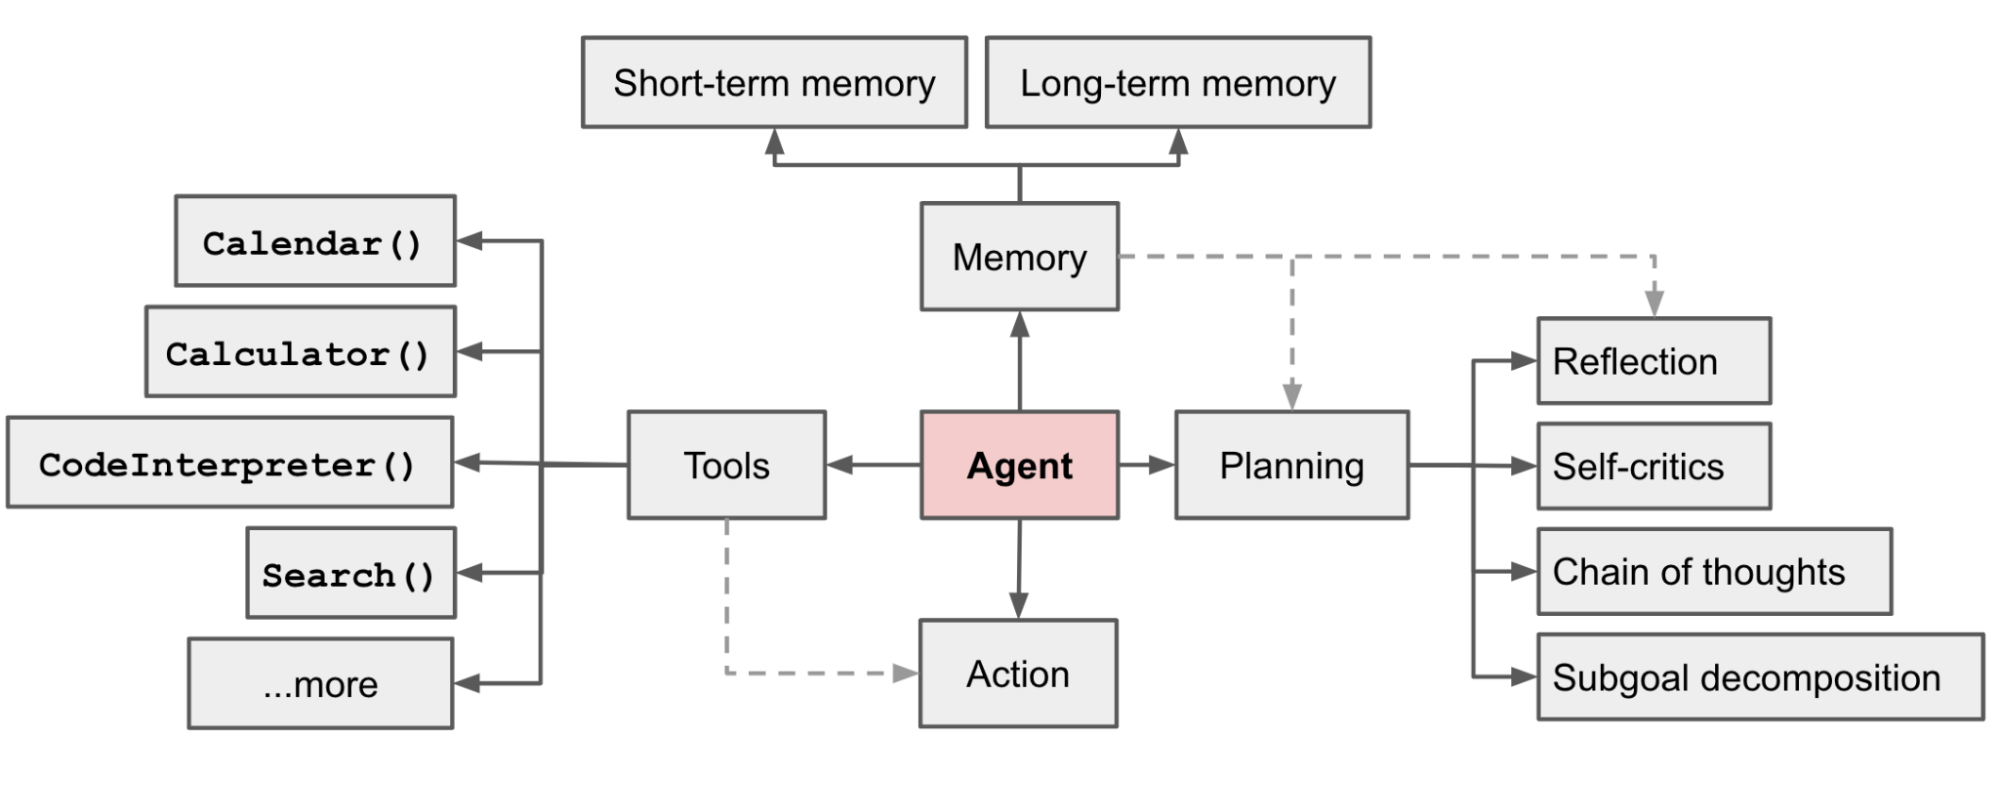
Referencia: https://lilianweng.github.io/posts/2023-06-23-agent/

# Planificación y 'razonamiento'

In [ ]:
from langchain import hub

paso1 = hub.pull("camilocs/analisis_del_lenguaje-paso1")
paso2 = hub.pull("camilocs/analisis_del_lenguaje-paso2")
paso3 = hub.pull("camilocs/analisis_del_lenguaje-paso3")


In [ ]:
print(paso1)

input_variables=['texto_a_analizar'] metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'analisis_del_lenguaje-paso1', 'lc_hub_commit_hash': '2864e6d1912035230cb22588e34d88adb79d6be64e1ff0ef99b3c891b2ae09ac'} template='Paso 1:\n¿Qué figuras retoricas detectas en el siguiente texto?\n"{texto_a_analizar}"\nEnumera  las figuras retoricas detectadas. \nR:'


In [ ]:
from langchain.chains import LLMChain
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate

model = "openai/gpt-3.5-turbo"

llm = ChatOpenRouter(
    model_name=model
)

chain_paso1 = LLMChain(
    llm=llm,
    prompt=paso1,
    output_key="figuras_retoricas_detectadas"
)

chain_paso2 = LLMChain(
    llm=llm,
    prompt=paso2,
    output_key="figuras_retoricas_seleccionadas"
)

chain_paso3 = LLMChain(
    llm=llm,
    prompt=paso3,
    output_key="ranking_figuras_retoricas"
)


In [ ]:
from langchain.chains import SequentialChain

overall_chain = SequentialChain(
    chains=[chain_paso1, chain_paso2, chain_paso3],
    input_variables=["texto_a_analizar", "figuras_retoricas_a_buscar"],
    output_variables=["ranking_figuras_retoricas"],
    verbose=True
)

texto_a_analizar = """
Conscientes de nuestras imperfecciones los humanos anhelamos entendernos. Tanto entre nosotros como en la relación que establecemos con nuestras tecnologías. Un lazo invisible nos une y nos impulsa a aprender, a cultivar nuestra curiosidad, a mantener nuestra impaciencia, a movernos, lo que nos mantiene en un estado de perpetua inconformidad. Somos como una suerte de manivela que, de vez en cuando —o, mejor dicho, seguidamente—, está en movimiento circular. Y las tecnologías, como prevemos, son un fiel reflejo de nosotros; en ellas están nuestras alegrías, miedos, inquietudes; además de nuestras falencias y nuestros aciertos, y nuestras aventuras. Y así la búsqueda humana consiste en idear artefactos que aumenten esos aciertos, que van mejorando a medida que vamos puliendo nuestras técnicas de construcción, para al fin: vivir mejor. Pero aquella búsqueda no está libre de retos y peligros, que buscan resurgir cada cierto tiempo, pues los avances tecnológicos se asoman en cada generación y cada uno de nosotros somos testigos de al menos una revolución. Y entre los ejemplos recientes se encuentra el teléfono móvil; precedido por Internet, la computadora personal, la televisión, el avión, la radio y el automóvil, que se remontan a la invención de la rueda y a las primeras herramientas de caza que aseguraban nuestra supervivencia. Pero, quizá nuestra mayor invención sea una que, desde su origen, vive en un manto de misterio: la escritura. Ésta nos ha acompañado durante siglos como medio de comunicación con el ansia de que nuestro presente se extienda al futuro. Experiencias. Desdichas. Proezas. Plegarias hacia un mañana en donde las nuevas generaciones podrían aprender de las previas. Y ahora que los sistemas de Inteligencia Artificial (IA) son capaces de generar texto que se lee convincente y gramaticalmente correcto, incluso con estilo, y a veces fiable, esto nos lleva a un estado de introspección y a preguntarnos, ¿qué le espera a la escritura humana ante tales avances?
"""

figuras_retoricas_a_buscar = ','.join(["metáfora", "antitesis", "comparación", "anáfora", "personificación"])

resultados = overall_chain(
            {
                "texto_a_analizar": texto_a_analizar,
                "figuras_retoricas_a_buscar": figuras_retoricas_a_buscar
            }
    )




> Entering new SequentialChain chain...

> Finished chain.


In [ ]:
resultados.get('ranking_figuras_retoricas')

'En el texto seleccionado, la metáfora es la figura retórica más importante. Esto se debe a que la metáfora es utilizada de manera recurrente a lo largo del texto para describir la relación entre el protagonista y su entorno. La metáfora de la "montaña rusa emocional" refleja de manera efectiva la intensidad de las emociones experimentadas por el personaje, así como la constante fluctuación entre momentos de felicidad y tristeza. Esta metáfora añade una capa de profundidad y complejidad al texto, permitiendo al lector comprender mejor la complejidad de los sentimientos del protagonista. Por lo tanto, la metáfora es la figura retórica más importante en este caso.'

## Agentes que interactuan con *herramientas*

### CSV

In [2]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_openai import OpenAI

In [ ]:
model = "openai/gpt-3.5-turbo"
agent = create_csv_agent(
    ChatOpenRouter(model_name=model),
    "/content/Top-100 Trending Books.csv",
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    allow_dangerous_code=True
)

In [ ]:
agent.run("¿Cuántas filas tienes el documento?")



> Entering new AgentExecutor chain...
Thought: To determine the number of rows in the dataframe, I can use the `shape` attribute of the dataframe which returns a tuple with the number of rows and columns.
Action: python_repl_ast
Action Input: df.shape(100, 8)The dataframe has 100 rows.
Final Answer: 100 rows.

> Finished chain.


'100 rows.'

In [ ]:
agent.run("Del género memoría, ¿cuál es el libro que tiene mejor ranking? También devuelve la url.")



> Entering new AgentExecutor chain...
Thought: We need to filter the dataframe for books with genre "Memoir" and then find the book with the highest rank.
Action: python_repl_ast
Action Input: df_mem = df[df['genre'] == 'Memoir']Now that we have filtered the dataframe for books with genre "Memoir", we can find the book with the highest rank.
Action: python_repl_ast
Action Input: df_mem[df_mem['Rank'] == df_mem['Rank'].max()][['book title', 'url']]       book title                                                url
11  Night (Night)  amazon.com/Night-Elie-Wiesel/dp/0374500010/ref...I now know the final answer
Final Answer: Night (Night) - amazon.com/Night-Elie-Wiesel/dp/0374500010/ref... is the book with the best ranking in the Memoir genre.

> Finished chain.


'Night (Night) - amazon.com/Night-Elie-Wiesel/dp/0374500010/ref... is the book with the best ranking in the Memoir genre.'

In [ ]:
model = "openai/gpt-4-turbo"
agent = create_csv_agent(
    ChatOpenRouter(model_name=model),
    ["/content/Top-100 Trending Books.csv", "/content/BestSeller Books of Amazon.csv"],
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    allow_dangerous_code=True
)

In [ ]:
agent.run("¿Qué autores están en ambos ficheros?")



> Entering new AgentExecutor chain...
Thought: To find the common authors in both dataframes, I need to extract the list of authors from each dataframe and then find the intersection of these lists.

Action: I will start by extracting the authors from the first dataframe (`df1`).
Action Input: df1['author']I will start by extracting the authors from the first dataframe (`df1`). is not a valid tool, try one of [python_repl_ast].To find the common authors in both dataframes, I need to first create lists of authors from each dataframe and then find the intersection of these lists. Based on the print output of each dataframe for df1 and df2, I can directly use the displayed information to identify the authors.

For df1, the authors are:
- Rebecca Yarros
- Britney Spears
- Barbra Streisand
- Matthew Perry
- Adam Wallace

For df2, the authors are:
- Gagan Pratap Sir
- Nikhil Gupta
- James Clear
- Wonder House Books
- Binay Karna

Next, I will identify any common authors between these two l

'No hay autores que estén en ambos ficheros.'

### PDF

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
from langchain.vectorstores import FAISS

model = "openai/gpt-3.5-turbo"

# 1. Cargar el PDF
loader = PyPDFLoader("/content/Curtis-Trudel 2023 - Limitative computational explanations.pdf")
documents = loader.load()

# 2. Dividir el texto en chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(documents)

# 3. Crear embeddings
embeddings = HuggingFaceEmbeddings()

# 4. Almacenar embeddings en FAISS
vector_store = FAISS.from_documents(texts, embeddings)

# 5. Crear un retriever
retriever = vector_store.as_retriever()

llm = ChatOpenRouter(model_name=model)

qa_chain = RetrievalQA.from_chain_type(llm, retriever=retriever)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
query = "¿Cuáles son las limitaciones computacionales que menciona el artículo?"
response = qa_chain.run(query)

print(response)

El artículo menciona que hay resultados limitativos en computación que indican que ciertos problemas no pueden ser resueltos por ciertos tipos de modelos computacionales, como el problema HALT. También se menciona que las explicaciones limitativas en computación se aplican a sistemas físicos que implementan un modelo computacional Turing-completo. Además, se discute la posibilidad de transformar un sistema computacional estándar en un sistema hipercomputacional, pero se argumenta que estas transformaciones son demasiado radicales para ser interpretadas en términos de explicación intervencionista.


### Wikipedia

In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType
from langchain.tools import WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

model = "openai/gpt-3.5-turbo"
# Configurar el modelo de lenguaje
llm = ChatOpenRouter(model_name=model)

# Configurar la herramienta de búsqueda en Wikipedia
wikipedia = WikipediaAPIWrapper()
wikipedia_tool = Tool(
    name="Wikipedia",
    func=WikipediaQueryRun(api_wrapper=wikipedia).run,
    description="Útil para cuando necesitas buscar información sobre una persona en Wikipedia."
)

prompt = hub.pull("camilocs/agent-wikipedia")

format_chain = LLMChain(llm=llm, prompt=prompt)

# Crear el agente
agent = initialize_agent(
    [wikipedia_tool],
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)


In [ ]:
# Ejemplo de uso
nombre_persona = "Alan Turing"
prompt = prompt.format(name=nombre_persona)
points = agent.run(prompt)



> Entering new AgentExecutor chain...
Debo buscar la información relevante sobre Alan Turing en Wikipedia y resumir sus tres contribuciones más importantes en formato JSON.
Action: Wikipedia
Action Input: 'Alan Turing'
Observation: Page: Alan Turing
Summary: Alan Mathison Turing  (; 23 June 1912 – 7 June 1954) was an English mathematician, computer scientist, logician, cryptanalyst, philosopher and theoretical biologist. Turing was highly influential in the development of theoretical computer science, providing a formalisation of the concepts of algorithm and computation with the Turing machine, which can be considered a model of a general-purpose computer. He is widely considered to be the father of theoretical computer science.
Born in London, Turing was raised in southern England. He graduated in maths from King's College, Cambridge, and in 1938, earned a maths PhD from Princeton University. During the Second World War, Turing worked for the Government Code and Cypher School at Bl

In [ ]:
points


'{"Contributions": ["Father of theoretical computer science", "Pioneer in computer science", "Contributions to codebreaking during WWII"]}'

In [ ]:
import json, pprint

resultado = json.loads(points)
pprint.pprint(resultado)


{'Contributions': ['Father of theoretical computer science',
                   'Pioneer in computer science',
                   'Contributions to codebreaking during WWII']}


### SearchAPI (https://www.searchapi.io)

In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType
from langchain.llms import OpenAI
from langchain.utilities import SearchApiAPIWrapper

model = "openai/gpt-3.5-turbo"
# Configurar tu API key de SearchAPI.io
SEARCHAPI_API_KEY = os.environ["SEACHAPI_API_KEY"]

# Configurar el modelo de lenguaje
llm = ChatOpenRouter(model_name=model)

# Configurar la herramienta de búsqueda con SearchAPI.io
search = SearchApiAPIWrapper(
    searchapi_api_key=SEARCHAPI_API_KEY,
    engine="google",  # Especificamos que queremos usar Google
    params={
        "num": 3,  # Número de resultados a devolver
    }
)

search_tool = Tool(
    name="Search Google",
    func=search.run,
    description="Útil para buscar información en Google sobre errores de programación y sus soluciones."
)

# Crear el agente
agent = initialize_agent(
    [search_tool],
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Función para buscar información sobre el error
def search_error_info(error_message):
    prompt_search = hub.pull("camilocs/agent-search-error-google")
    prompt_search = prompt_search.format(error_message=error_message)
    return agent.run(prompt_search)

# Ejemplo de uso
error_message = "Busca este error: 'ValueError: not enough values to unpack (expected 3, got 1)'"
result = search_error_info(error_message)
print(result)



> Entering new AgentExecutor chain...
Debería usar la herramienta de búsqueda de Google para encontrar información sobre el error "ValueError: not enough values to unpack (expected 3, got 1)" en Python y sus posibles soluciones. 
Action: Search Google
Action Input: "ValueError: not enough values to unpack (expected 3, got 1) Python error solution"
Observation: make sure the number of values you unpack from an iterable is equal to the number of values in that iterable
Thought:La observación sugiere que el error se produce al intentar desempaquetar un número incorrecto de valores de un iterable en Python.
Action: Search Google
Action Input: "Python unpacking error not enough values to unpack"
Observation: typically occurs when a sequence is being unpacked into more variables than the sequence contains
Thought:El error "ValueError: not enough values to unpack (expected 3, got 1)" en Python ocurre cuando intentas desempaquetar un número incorrecto de valores de un iterable. Esto sucede a

In [ ]:
print(result)

El error "ValueError: not enough values to unpack (expected 3, got 1)" en Python se produce al intentar desempaquetar un número incorrecto de valores de un iterable. Para solucionarlo, asegúrate de que el número de valores que desempaquetas sea igual al número de valores en ese iterable.


### SQLite

In [ ]:
import sqlite3
from langchain.sql_database import SQLDatabase
from langchain_experimental.sql import SQLDatabaseChain
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.prompts.prompt import PromptTemplate
from langchain import hub

model = "openai/gpt-3.5-turbo"

# Crear una base de datos SQLite en memoria
db = sqlite3.connect(':memory_local_2:')
cursor = db.cursor()

# Función para crear la tabla basada en el esquema proporcionado
def create_table(schema):
    cursor.execute(schema)
    db.commit()

# Función para insertar datos de ejemplo
def insert_sample_data(table_name, data):
    placeholders = ', '.join(['?'] * len(data[0]))
    cursor.executemany(f'INSERT INTO {table_name} VALUES ({placeholders})', data)
    db.commit()

# Configurar el modelo de lenguaje
model = "openai/gpt-3.5-turbo"
llm = ChatOpenRouter(model_name=model)

# Crear una instancia de SQLDatabase
sqlite_db = SQLDatabase.from_uri("sqlite:///:memory_local:")

toolkit = SQLDatabaseToolkit(db=sqlite_db, llm=llm)

# Plantilla para el prompt
prompt = hub.pull("camilocs/agent-sql")

# Ejemplo de uso
schema = """
CREATE TABLE empleados (
    id INTEGER PRIMARY KEY,
    nombre TEXT,
    departamento TEXT,
    salario REAL
)
"""

# Crear la tabla
create_table(schema)

# Insertar datos de ejemplo
sample_data = [
    (1, 'Juan Pérez', 'Ventas', 50000),
    (2, 'María García', 'Marketing', 55000),
    (3, 'Carlos Rodríguez', 'IT', 60000),
    (4, 'Ana Martínez', 'Recursos Humanos', 52000),
    (5, 'Luis Sánchez', 'Ventas', 51000)
]
insert_sample_data('empleados', sample_data)


In [ ]:
from langchain.agents import create_sql_agent

def execute_sql(sql_query):
  # Ejecutar la consulta SQL
    try:
        cursor.execute(sql_query)
        results = cursor.fetchall()
        for row in results:
            print(row)
    except sqlite3.Error as e:
        print(f"Error al ejecutar la consulta: {e}")

# Función para generar y ejecutar la consulta SQL
def generate_and_execute_query(schema, question):
    # Generar la consulta SQL
    prompt_with_variables = prompt.format(esquema_sql=schema, pregunta=question)

    agent_executor = create_sql_agent(
      llm=llm,
      toolkit=toolkit,
      verbose=True,
      agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    )
    query_result = agent_executor.run(prompt_with_variables)
    print("Resultado del agente:")
    print(query_result)
    #execute_sql(query_result)



# Ejemplo de pregunta en lenguaje natural
question = "¿Cuál es el salario promedio por departamento?"

# Generar y ejecutar la consulta
generate_and_execute_query(schema, question)



> Entering new SQL Agent Executor chain...
I need to calculate the average salary per department by using the SQL query.
Action: sql_db_query
Action Input: SELECT departamento, AVG(salario) AS salario_promedio FROM empleados GROUP BY departamento[('IT', 60000.0), ('Marketing', 55000.0), ('Recursos Humanos', 52000.0), ('Ventas', 50500.0)]I now know the final answer.
Final Answer: El salario promedio por departamento es: IT - $60,000, Marketing - $55,000, Recursos Humanos - $52,000, Ventas - $50,500.

> Finished chain.
Resultado del agente:
El salario promedio por departamento es: IT - $60,000, Marketing - $55,000, Recursos Humanos - $52,000, Ventas - $50,500.


In [ ]:
execute_sql("SELECT * FROM empleados")

(1, 'Juan Pérez', 'Ventas', 50000.0)
(2, 'María García', 'Marketing', 55000.0)
(3, 'Carlos Rodríguez', 'IT', 60000.0)
(4, 'Ana Martínez', 'Recursos Humanos', 52000.0)
(5, 'Luis Sánchez', 'Ventas', 51000.0)


Más ejemplos: https://python.langchain.com/v0.2/docs/integrations/retrievers/

# Memoria

## De largo plazo

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
from langchain_openai import ChatOpenAI

model = "openai/gpt-3.5-turbo"
# URL del sitio web del que deseas cargar el contenido
url = "https://www.espn.com.mx/futbol/resultados/_/league/conmebol.america"

# Crear una instancia del WebBaseLoader con la URL
loader = WebBaseLoader(url)

# Cargar los documentos desde la URL
docs = loader.load()

# Dividir los documentos en chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
documents = text_splitter.split_documents(docs)

# Crear el índice vectorial
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Guardar el índice en disco
index_name = "futbol-index"

vector_store = FAISS.from_documents(documents, embeddings)

# 5. Crear un retriever
vector_store.save_local("/content/", index_name=index_name)

# Para cargar el índice más tarde:
loaded_vector_store = FAISS.load_local("/content/", embeddings, index_name=index_name, allow_dangerous_deserialization=True)

retriever = loaded_vector_store.as_retriever()

# Configurar el modelo de lenguaje
llm = ChatOpenRouter(model_name=model)

# Crear una cadena de pregunta-respuesta
qa_chain = RetrievalQA.from_chain_type(llm, retriever=retriever)

# Función para hacer preguntas
def ask_question(question):
    response = qa_chain.invoke({"query": question})
    return response["result"]



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
# Ejemplo de uso
question = "¿Cuáles fueron los últimos resultados de partidos que han terminado de la Copa America 2024?"
answer = ask_question(question)
print(f"Pregunta: {question}")
print(f"Respuesta: {answer}")

Pregunta: ¿Cuáles fueron los últimos resultados de partidos que han terminado de la Copa America 2024?
Respuesta: Los últimos resultados de partidos de la Copa América 2024 fueron:

- Colombia vs. Costa Rica: 0-0
- Paraguay vs. Brasil: 0-0


## De corto plazo

In [ ]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain.agents import AgentExecutor
from langchain.agents import create_openai_functions_agent
from langchain.tools.retriever import create_retriever_tool
from langchain import hub

In [ ]:
# Get the prompt to use - you can modify this!
prompt = hub.pull("camilocs/agent-short-memory")
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='Tú eres un asistente útil.')),
 MessagesPlaceholder(variable_name='chat_history'),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [ ]:
retriever_tool = create_retriever_tool(
    retriever,
    "informatica_search",
    "Para obtener información sobre computación, ¡usa está herramienta!",
)

In [ ]:

llm = ChatOpenRouter(model_name=model)

tools = [retriever_tool]
agent = create_openai_functions_agent(
    llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

message_history = ChatMessageHistory()
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    lambda session_id: message_history,
    input_messages_key="input",
    history_messages_key="chat_history",
)

In [ ]:
agent_with_chat_history.invoke(
    {"input": "Ten en cuenta esta ecuación: x = 10 + y, donde x = 12. Ya te preguntaré sobre esto más adelante."},
    config={"configurable": {"session_id": "<xyz_26-06-2024>"}},
)



> Entering new AgentExecutor chain...
Entendido, tomaré nota de la ecuación x = 10 + y, donde x = 12. Cuando estés listo, házmelo saber y podemos analizarla juntos. ¿Hay algo más en lo que pueda ayudarte por ahora?

> Finished chain.


{'input': 'Ten en cuenta esta ecuación: x = 10 + y, donde x = 12. Ya te preguntaré sobre esto más adelante.',
 'chat_history': [],
 'output': 'Entendido, tomaré nota de la ecuación x = 10 + y, donde x = 12. Cuando estés listo, házmelo saber y podemos analizarla juntos. ¿Hay algo más en lo que pueda ayudarte por ahora?'}

In [ ]:
agent_with_chat_history.invoke(
    {"input": "¿Cuál es el valor de y?"},
    config={"configurable": {"session_id": "<xyz_26-06-2024>"}},
)



> Entering new AgentExecutor chain...
Para encontrar el valor de y en la ecuación x = 10 + y, donde x = 12, simplemente sustituimos el valor de x en la ecuación y resolvemos para y.

Dado que x = 12 y x = 10 + y, podemos reescribir la ecuación como:

12 = 10 + y

Restamos 10 en ambos lados para aislar y:

12 - 10 = 10 + y - 10
2 = y

Por lo tanto, el valor de y en la ecuación es y = 2. ¡Si tienes alguna otra pregunta o necesitas más ayuda, házmelo saber!

> Finished chain.


{'input': '¿Cuál es el valor de y?',
 'chat_history': [HumanMessage(content='Ten en cuenta esta ecuación: x = 10 + y, donde x = 12. Ya te preguntaré sobre esto más adelante.'),
  AIMessage(content='Entendido, tomaré nota de la ecuación x = 10 + y, donde x = 12. Cuando estés listo, házmelo saber y podemos analizarla juntos. ¿Hay algo más en lo que pueda ayudarte por ahora?')],
 'output': 'Para encontrar el valor de y en la ecuación x = 10 + y, donde x = 12, simplemente sustituimos el valor de x en la ecuación y resolvemos para y.\n\nDado que x = 12 y x = 10 + y, podemos reescribir la ecuación como:\n\n12 = 10 + y\n\nRestamos 10 en ambos lados para aislar y:\n\n12 - 10 = 10 + y - 10\n2 = y\n\nPor lo tanto, el valor de y en la ecuación es y = 2. ¡Si tienes alguna otra pregunta o necesitas más ayuda, házmelo saber!'}

# Más tools

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

# Inicializar el modelo de lenguaje
model = "openai/gpt-3.5-turbo"
llm = ChatOpenRouter(model_name=model)

# Cargar herramientas para el agente
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

# Inicializar el agente
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# Ejecutar el agente con una tarea que requiere múltiples pasos de pensamiento
result = agent.run("¿Cuál es la raíz cuadrada del año en que nació John von Neumann multiplicado por 2?")

print(result)



> Entering new AgentExecutor chain...
Since we are dealing with a mathematical operation, we should use the calculator tool.
Action: Calculator
Action Input: sqrt(1903*2)
Observation: Answer: 61.69278726074872
Thought:I now know the final answer
Final Answer: 61.69

> Finished chain.
61.69


In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

# Inicializar el modelo de lenguaje
model = "openai/gpt-3.5-turbo"
llm = ChatOpenRouter(model_name=model)

# Cargar herramientas para el agente
tools = load_tools(["arxiv"], llm=llm)

# Inicializar el agente
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

result = agent.run("Busca articulos sobre agentes y LLM publicados en junio del 2024. Añade la url.")
print(result)



> Entering new AgentExecutor chain...
I should use arxiv to search for articles on agents and LLM published in June 2024.
Action: arxiv
Action Input: agents LLM June 2024
Observation: Published: 2024-05-23
Title: Exploring Prosocial Irrationality for LLM Agents: A Social Cognition View
Authors: Xuan Liu, Jie Zhang, Song Guo, Haoyang Shang, Chengxu Yang, Quanyan Zhu
Summary: Large language models (LLMs) have been shown to face hallucination issues due
to the data they trained on often containing human bias; whether this is
reflected in the decision-making process of LLM agents remains under-explored.
As LLM Agents are increasingly employed in intricate social environments, a
pressing and natural question emerges: Can LLM Agents leverage hallucinations
to mirror human cognitive biases, thus exhibiting irrational social
intelligence? In this paper, we probe the irrational behavior among
contemporary LLM agents by melding practical social science experiments with
theoretical insights. Sp

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI
from langchain_experimental.tools import PythonREPLTool

# Inicializar el modelo de lenguaje
model = "openai/gpt-4-turbo"
llm = ChatOpenRouter(model_name=model)

agent = initialize_agent(
    tools=[PythonREPLTool()],
    llm=llm,
)

result = agent.invoke("Lee el fichero /content/config.yml y dime cuántos caracteres tiene")
print(result)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.3.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


{'input': 'Lee el fichero /content/config.yml y dime cuántos caracteres tiene', 'output': 'I am unable to access or read files directly from /content/config.yml or any other location. Please provide the content of the file, or specific details related to your question, and I can assist you further based on that information.'}


In [ ]:
result = agent.invoke("Muestrame la imagen /content/grafo.png en esta celda (estoy en google colab)")
print(result)

{'input': 'Muestrame la imagen /content/grafo.png en esta celda (estoy en google colab)', 'output': "I'm unable to display images directly in this chat environment. To view an image in Google Colab, you can use the following Python code in a cell in Google Colab:\n\n```python\nfrom IPython.display import Image\nImage('/content/grafo.png')\n```\nThis code will display the image located at `/content/grafo.png` in your Google Colab notebook."}


In [ ]:
agent.invoke("Quiero ver la imagen de esta /content/grafo.png. Como archivo incrustado en la celda de resultado")

{'input': 'Quiero ver la imagen de esta /content/grafo.png. Como archivo incrustado en la celda de resultado',
 'output': "Unfortunately, I can't display images directly here. You can view the image by opening it with an image viewer on your device if it's a local file, or by entering its URL into a web browser if it's hosted online. If you need help with specific code to handle images in a programming context, feel free to ask!"}

In [ ]:
from langchain.agents import get_all_tool_names
get_all_tool_names()

['sleep',
 'wolfram-alpha',
 'google-search',
 'google-search-results-json',
 'searx-search-results-json',
 'bing-search',
 'metaphor-search',
 'ddg-search',
 'google-lens',
 'google-serper',
 'google-scholar',
 'google-finance',
 'google-trends',
 'google-jobs',
 'google-serper-results-json',
 'searchapi',
 'searchapi-results-json',
 'serpapi',
 'dalle-image-generator',
 'twilio',
 'searx-search',
 'merriam-webster',
 'wikipedia',
 'arxiv',
 'golden-query',
 'pubmed',
 'human',
 'awslambda',
 'stackexchange',
 'sceneXplain',
 'graphql',
 'openweathermap-api',
 'dataforseo-api-search',
 'dataforseo-api-search-json',
 'eleven_labs_text2speech',
 'google_cloud_texttospeech',
 'read_file',
 'reddit_search',
 'news-api',
 'tmdb-api',
 'podcast-api',
 'memorize',
 'llm-math',
 'open-meteo-api',
 'requests',
 'requests_get',
 'requests_post',
 'requests_patch',
 'requests_put',
 'requests_delete',
 'terminal']

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

# Inicializar el modelo de lenguaje
model = "openai/gpt-3.5-turbo"
llm = ChatOpenRouter(model_name=model)

# Cargar herramientas para el agente
tools = load_tools(["llm-math"], llm=llm)

# Inicializar el agente
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# Ejecutar el agente con una tarea que requiere múltiples pasos de pensamiento
result = agent.run("""
Busca el número que sigue a está serie:
1,2,3,5,8,13,
""")

print(result)



> Entering new AgentExecutor chain...
This looks like a Fibonacci series.
Action: Calculator
Action Input: Find the next number in the Fibonacci sequence after 1, 2, 3, 5, 8, 13
Observation: Answer: 21
Thought:I now know the final answer
Final Answer: 21

> Finished chain.
21


In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

# Inicializar el modelo de lenguaje
model = "openai/gpt-3.5-turbo"
llm = ChatOpenRouter(model_name=model)

# Cargar herramientas para el agente
tools = load_tools(["searchapi"], llm=llm)

# Inicializar el agente
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# Ejecutar el agente con una tarea que requiere múltiples pasos de pensamiento
result = agent.run("""
Cuál es la temperatura en Barcelona (España) en celsius
""")

print(result)



> Entering new AgentExecutor chain...
I will need to use the searchapi tool to find the current temperature in Barcelona.
Action: searchapi
Action Input: Temperature in Barcelona Spain
Observation: Barcelona, Barcelona, Spain 10-Day Weather Forecaststar_ratehome. icon 88 °F Aribau - Barcelona ... Temperature. High. 80 °F. 78 °F. 0 °F. Low. 70 °F. 63 °F.
10 Day Weather-Barcelona, Barcelona, Spain​​ Clear skies this evening will give way to occasional showers overnight. Low around 70F. Winds ENE at 10 to 15 mph.
10-Day Weather Forecast ; Today. 6/28. 86° 72°. Partly sunny and nice. Night: Humid with increasing clouds ; Sat. 6/29. 80° 71°. A few morning showers; humid.
Find a forecast · Today. 28° 83° 22° 71°. Sunrise: 06:21. Sunset: 21:29 · Sat 29 Jun. 26° 80° 21° 71°. Sunrise: 06:21. Sunset: 21:29 · Sun 30 Jun. 24° 76° 21° 70°.
Friday, Saturday. Morning, Afternoon, Evening, Night, Morning, Afternoon, Evening. Forecast. Temperature, 76 °F, 82 °F, 77 °F, 70 °F, 72 °F, 79 °F, 78 °F.
Barc